In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pycountry

In [3]:
import pandas as pd
df = pd.read_csv(r'C:\Users\av\Database\netflix_titles.csv')
display(df)
print(df)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [4]:
for i in df.columns:
    null_rate = df[i].isna().sum()/len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [5]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan,'No data',inplace=True)
df['director'].replace(np.nan,'No data',inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

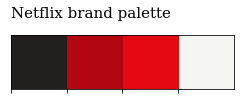

In [6]:
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])
plt.title("Netflix brand palette",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

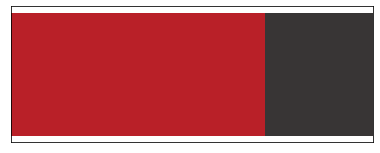

In [9]:
x = df.groupby(['type'])['type'].count()
y = len(df)
r=((x/y)).round(2)
mf_ratio = pd.DataFrame(r).T
fig, ax = plt.subplots(1,1,figsize=(6.5,2.5))
ax.barh(mf_ratio.index, mf_ratio['Movie'],
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'],
        color='#221f1f', alpha=0.9, label='Female')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

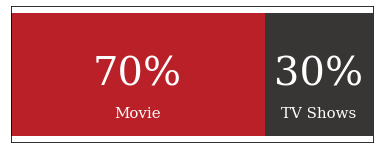

In [11]:
fig, ax = plt.subplots(1,1,figsize=(6.5,2.5))
ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='Female')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%",
                xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2,i),
                va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                color='white')
    ax.annotate("TV Shows", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
plt.show()


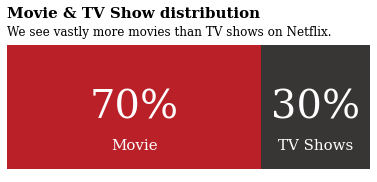

In [12]:
fig, ax = plt.subplots(1,1,figsize=(6.5,2.5))
ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='Female')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%",
                xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2,i),
                va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                color='white')
    ax.annotate("TV Shows", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
fig.text(0.125,1.0,'Movie & TV Show distribution',fontfamily='serif',fontsize=15,fontweight='bold')
fig.text(0.125,0.90,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12,fontweight='light')
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)
ax.legend().set_visible(False)
plt.show()

In [13]:
from datetime import datetime
tl_dates = [
    "1997nFounded",
    "1998nMail Services",
    "2003nGoes Public",
    "2007nStreming service",
    "2016nGoes Global",
    "2021nNetflix & Chill"
]
tl_x = [1,2,4,5.3,8,9]

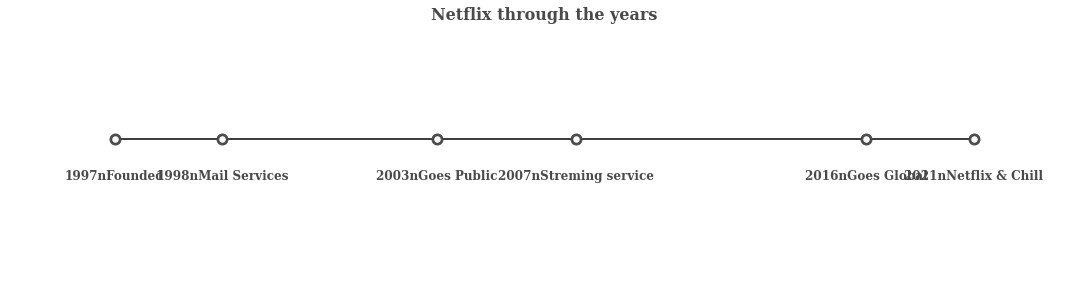

In [14]:
fig,ax = plt.subplots(figsize=(15,4),constrained_layout=True)
ax.set_ylim(-2,1.5)
ax.set_xlim(0,10)
ax.axhline(0, xmin=0.1, xmax=0.9,c="#000000",zorder=1)
ax.scatter(tl_x,np.zeros(len(tl_x)),s=120,c="#4a4a4a",zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=12)
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
plt.show()

In [15]:
df['country']

0       United States
1        South Africa
2       United States
3       United States
4               India
            ...      
8802    United States
8803    United States
8804    United States
8805    United States
8806            India
Name: country, Length: 8790, dtype: object

In [16]:
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country']

0       United States
1        South Africa
2       United States
3       United States
4               India
            ...      
8802    United States
8803    United States
8804    United States
8805    United States
8806            India
Name: first_country, Length: 8790, dtype: object

In [17]:
df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)
df['count']=1 #helper column
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

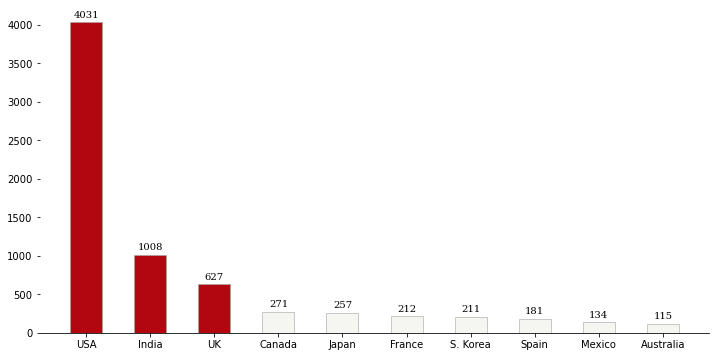

In [18]:
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1]= color_map[2] = '#b20710'
fig,ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(data.index,data,width=0.5,edgecolor='darkgray',linewidth=0.6,color=color_map)
for i in data.index:
    ax.annotate(f"{data[i]}",xy=(i,data[i]+100),va='center',ha='center',fontweight='light',fontfamily='serif')
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

In [19]:
fig.text(0.125,1,'Top 10 countries on Netflix',fontsize=15,fontweight='bold',fontfamily='serif')
fig.text(0.125,0.95,'The three most frequent countries have been highlighted.',fontsize=10,fontweight='light',fontfamily='serif')
fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.67, '''
Here we see that US is major content 
producers for Netflix, and on second
we have India after UK and so on.
Netflix being a US Company, it makes 
sense that they major producers.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.5)

In [33]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
colors = ['#FF0000', '#00FF00', '#0000FF'] # danh sách các màu
cmap = ListedColormap(colors)

In [34]:
from PIL import Image
image = Image.open(r"C:\Users\av\Database\mask.png")
x0, y0, x1, y1 = image.getbbox()
width = x1 - x0
height = y1 - y0
print("Kích thước của ảnh là", width, "x", height)

Kích thước của ảnh là 1050 x 1335


In [36]:
import numpy as np
arr = np.array([[1, 2], [3, 4], [5, 6]])
print("Mảng gốc:")
print(arr)
transposed_arr = np.transpose(arr)
print("Mảng đã chuyển vị:")
print(transposed_arr)

Mảng gốc:
[[1 2]
 [3 4]
 [5 6]]
Mảng đã chuyển vị:
[[1 3 5]
 [2 4 6]]


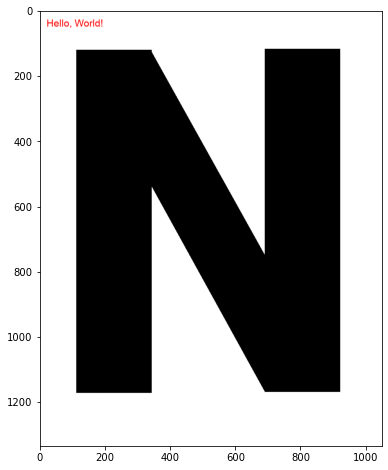

In [72]:
from PIL import Image, ImageFont, ImageDraw
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib
img = Image.open(r'C:\Users\av\Database\mask.png')
font = ImageFont.truetype(r'C:\Users\av\Database\arial.ttf', size=30)
draw = ImageDraw.Draw(img)
draw.text((20, 20), 'Hello, World!', fill=(255, 0, 0), font=font)
img = img.convert('RGB')
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(img)
cmap = plt.get_cmap('jet')

In [75]:
from PIL import Image, ImageDraw, ImageFont, ImageOps
img = Image.open(r'C:\Users\av\Database\mask.png').convert('RGBA')
font = ImageFont.truetype(r'C:\Users\av\Database\arial.ttf', size=30)
draw = ImageDraw.Draw(img)
bbox = draw.textbbox((0, 0), "Hello, World!", font=font)
print(bbox)

(0, 6, 173, 32)
